# PROJECT 1_LEVEL _ 1

# Exploratory Data Analysis (EDA) on Retail Sales Data



## Introduction

In this project,  will be working with a retail sales dataset to conduct a thorough Exploratory Data Analysis (EDA). The primary goal is to uncover patterns, trends, and actionable insights that can support the retail business in making informed, data-driven decisions.

## Project Objectives:

#### Data Loading and Cleaning:

Load the dataset and clean it by handling missing values, removing outliers, and ensuring data consistency.

#### Descriptive Statistics:

Calculate basic statistics like mean, median, mode, standard deviation, and explore the distribution of key variables.

#### Time Series Analysis:

Analyze sales trends over time using time series techniques to identify seasonality, trends, and potential anomalies.

#### Customer and Product Analysis:

Investigate customer demographics and purchasing behaviors, as well as product performance.

#### Data Visualization:

Create insightful visualizations such as bar charts, line plots, and heatmaps to communicate the findings effectively.

#### Recommendations:

Based on the analysis, provide actionable recommendations to improve sales, customer targeting, and inventory management.

#### Tools and Libraries:
This project will use the following Python libraries:

Pandas: For data manipulation and analysis
NumPy: For numerical operations
Matplotlib & Seaborn: For data visualization
Plotly: For interactive visualizations
Statsmodels: For time series analysis

## Key Challenges:

Dealing with missing or inconsistent data.
Analyzing seasonal and trend components in the time series data.
Identifying key customer segments and product categories that drive sales.

### Loading necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Cleaning

In [2]:
# Loading data from Github
url = "https://raw.githubusercontent.com/preethiakshai/OASIS/main/retail_sales_dataset.csv"
try:
    retail_data = pd.read_csv(url, on_bad_lines='skip')
    print(retail_data)
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0           3              50

## Data Set Study

The dataset consists of 1,000 entries with the following columns:

Transaction ID: A unique identifier for each transaction, allowing tracking and reference.

Date: The date when the transaction occurred, providing insights into sales trends over time.

Customer ID: A unique identifier for each customer, enabling customer-centric analysis.

Gender: The gender of the customer (Male/Female), offering insights into gender-based purchasing patterns.

Age: The age of the customer, facilitating segmentation and exploration of age-related influences.

Product Category: The category of the purchased product (e.g., Electronics, Clothing, Beauty), helping understand product preferences.

Quantity: The number of units of the product purchased, contributing to insights on purchase volumes.

Price per Unit: The price of one unit of the product, aiding in calculations related to total spending.

Total Amount: The total monetary value of the transaction, showcasing the financial impact of each purchase.

In [3]:
# number of colums and rows of  the data set
shape_=retail_data.shape
print("Number of rows =",shape_[0])
print("Number of columns = ", shape_[1])

Number of rows = 1000
Number of columns =  9


In [4]:
retail_data.columns.tolist() # Listing the 

['Transaction ID',
 'Date',
 'Customer ID',
 'Gender',
 'Age',
 'Product Category',
 'Quantity',
 'Price per Unit',
 'Total Amount']

In [5]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
# null values
retail_data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

There no null values in the data set

In [7]:
# Check for duplicate rows
duplicate_rows = retail_data.duplicated().sum()
duplicate_rows

0

#### There is no missing values or null values in the data set.

In [8]:
#### Dates are converted to datetime format for easy analysis.

In [9]:

# Data Cleaning: Convert 'Date' column to datetime format
retail_data['Date'] = pd.to_datetime(retail_data['Date'])
retail_data.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


### Descriptive Statistics

In [10]:
des_stat=retail_data.describe()
des_stat

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [11]:
# AGE

AGE_stat = retail_data['Age'].describe()
AGE_stat

count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: Age, dtype: float64

In [12]:
Quality_stat=retail_data['Quantity'].describe()
Quality_stat

count    1000.000000
mean        2.514000
std         1.132734
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Quantity, dtype: float64

In [13]:
Price_per_unit_stat=retail_data['Price per Unit'].describe()
Price_per_unit_stat

count    1000.000000
mean      179.890000
std       189.681356
min        25.000000
25%        30.000000
50%        50.000000
75%       300.000000
max       500.000000
Name: Price per Unit, dtype: float64

In [14]:
Total_price_stat=retail_data['Total Amount'].describe()
Total_price_stat

count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: Total Amount, dtype: float64

### Time Series Analysis
To analyze sales trends using time series techniques, we can apply methods such as moving averages, decomposition, and seasonality detection.



In [15]:
# Add a 'Month' column for monthly sales analysis
retail_data['Month'] = retail_data['Date'].dt.to_period('M')
retail_data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023-11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023-02
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023-01
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023-05
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023-05


In [16]:
#### analyze sales trends over time. Group by month and calculate total sales
monthly_sales = retail_data.groupby('Month')['Total Amount'].sum()
monthly_sales


Month
2023-01    35450
2023-02    44060
2023-03    28990
2023-04    33870
2023-05    53150
2023-06    36715
2023-07    35465
2023-08    36960
2023-09    23620
2023-10    46580
2023-11    34920
2023-12    44690
2024-01     1530
Freq: M, Name: Total Amount, dtype: int64

In [17]:
# Convert the Series to a DataFrame
monthly_sales_df = monthly_sales.reset_index()
monthly_sales_df.columns = ['Date', 'Total Amount']  # Rename the columns
print(monthly_sales_df)

       Date  Total Amount
0   2023-01         35450
1   2023-02         44060
2   2023-03         28990
3   2023-04         33870
4   2023-05         53150
5   2023-06         36715
6   2023-07         35465
7   2023-08         36960
8   2023-09         23620
9   2023-10         46580
10  2023-11         34920
11  2023-12         44690
12  2024-01          1530


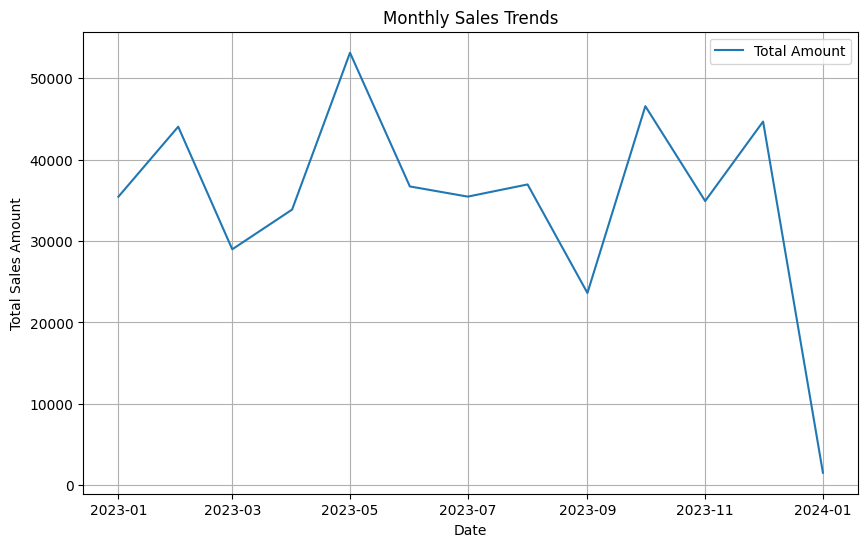

In [18]:
# Convert the 'Month' column to datetime format
monthly_sales_df['Date'] = monthly_sales_df['Date'].dt.to_timestamp()

# Plot time series of sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_df['Date'], monthly_sales_df['Total Amount'], label='Total Amount')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.legend()
plt.grid(True)
plt.show()

####  Moving Average 

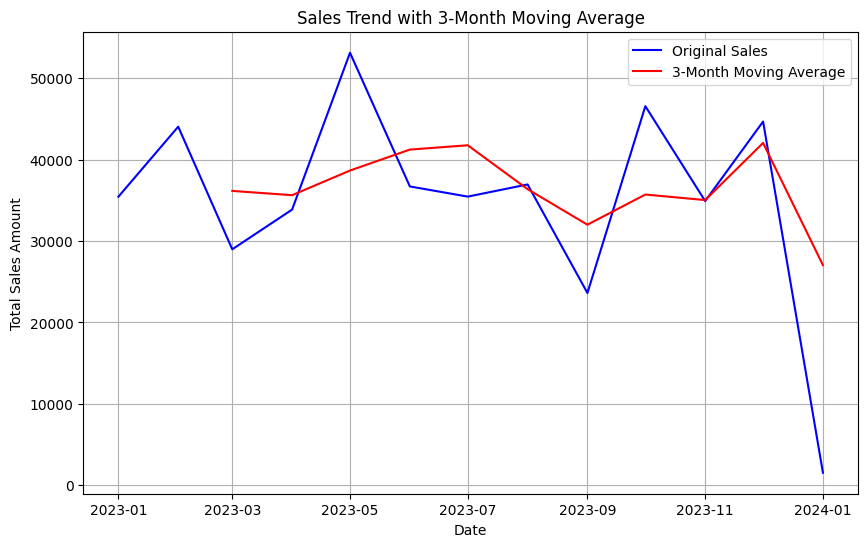

In [30]:
# Calculate the 3-month moving average
monthly_sales_df['3-Month Moving Average'] = monthly_sales_df['Total Amount'].rolling(window=3).mean()

# Plot original sales data vs. moving average
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_df['Date'], monthly_sales_df['Total Amount'], label='Original Sales', color='blue')
plt.plot(monthly_sales_df['Date'], monthly_sales_df['3-Month Moving Average'], label='3-Month Moving Average', color='red')
plt.title('Sales Trend with 3-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.legend()
plt.grid(True)
plt.show()

#### Stationarity Test

Stationary time series have constant mean and variance over time, which is required for forecasting models like ARIMA. The Augmented Dickey-Fuller (ADF) test checks for stationarity.

In [19]:

from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the correct column
result = adfuller(monthly_sales_df['Total Amount'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Interpretation:
if result[1] > 0.05:
    print("The time series is non-stationary.")
else:
    print("The time series is stationary.")


ADF Statistic: -3.6702088100655903
p-value: 0.0045522517976560595
The time series is stationary.


#### Note :  p-value is 0.0046 is less than 0.05 we can conclude that the time series is stationary. This means that the statistical properties of the series (like mean and variance) do not change over time

### Customer and Product Analysis

In [20]:


# Gender distribution
gender_counts = retail_data['Gender'].value_counts()
gender_sales = retail_data.groupby('Gender')['Total Amount'].sum()
print(gender_sales)
print(gender_counts)

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64
Gender
Female    510
Male      490
Name: count, dtype: int64


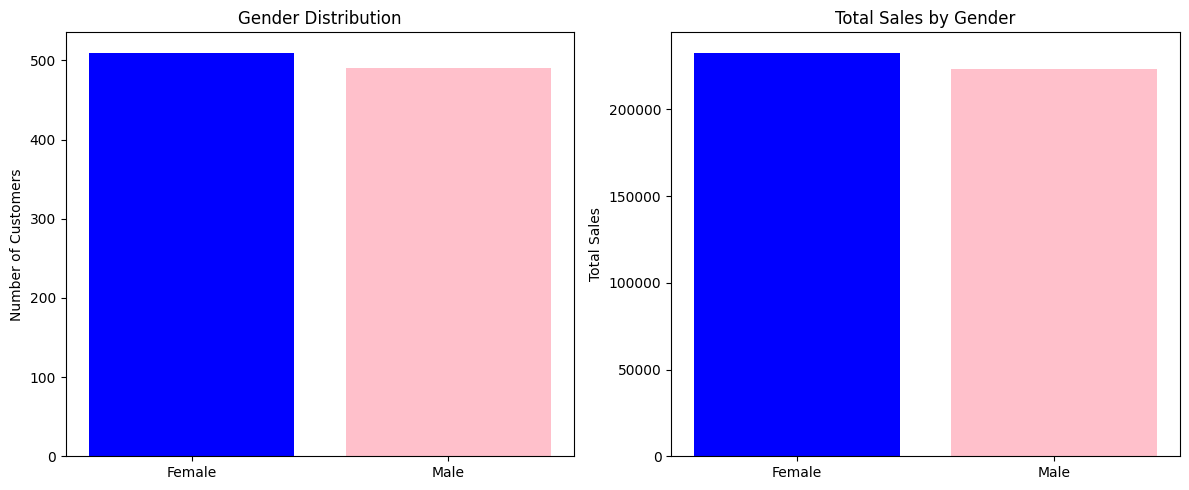

In [21]:
# Plot gender distribution
fig, ax1 = plt.subplots(1, 2, figsize=(12, 5))

ax1[0].bar(gender_counts.index, gender_counts, color=['blue', 'pink'])
ax1[0].set_title('Gender Distribution')
ax1[0].set_ylabel('Number of Customers')

ax1[1].bar(gender_sales.index, gender_sales, color=['blue', 'pink'])
ax1[1].set_title('Total Sales by Gender')
ax1[1].set_ylabel('Total Sales')

plt.tight_layout()
plt.show()

In [22]:
## Age distribution and spending by age group
age_distribution = retail_data['Age'].value_counts().sort_index()
age_sales = retail_data.groupby('Age')['Total Amount'].sum()
print(age_distribution)
print(age_sales)

Age
18    21
19    21
20    21
21    20
22    27
23    24
24    15
25    20
26    22
27    23
28    21
29    16
30    22
31    22
32    19
33    10
34    28
35    22
36    15
37    16
38    19
39    18
40    24
41    21
42    26
43    31
44    15
45    17
46    25
47    26
48    18
49    19
50    23
51    30
52    22
53    17
54    28
55    21
56    19
57    30
58    14
59    17
60    22
61    18
62    27
63    17
64    31
Name: count, dtype: int64
Age
18    11215
19    14870
20     8645
21    12585
22    13700
23     8220
24     5415
25     9900
26    13980
27     9385
28     8670
29     6570
30     9790
31    10220
32     5550
33     6240
34    16785
35    11290
36     9105
37    11650
38    11100
39     4595
40     9415
41     5650
42     8500
43    17970
44     7560
45     6325
46    13090
47    12505
48     7240
49     5110
50     9845
51    16065
52     7040
53     9510
54    10505
55     9780
56     9440
57     9290
58     7395
59     9470
60    11590
61     6730
62     8120
63 

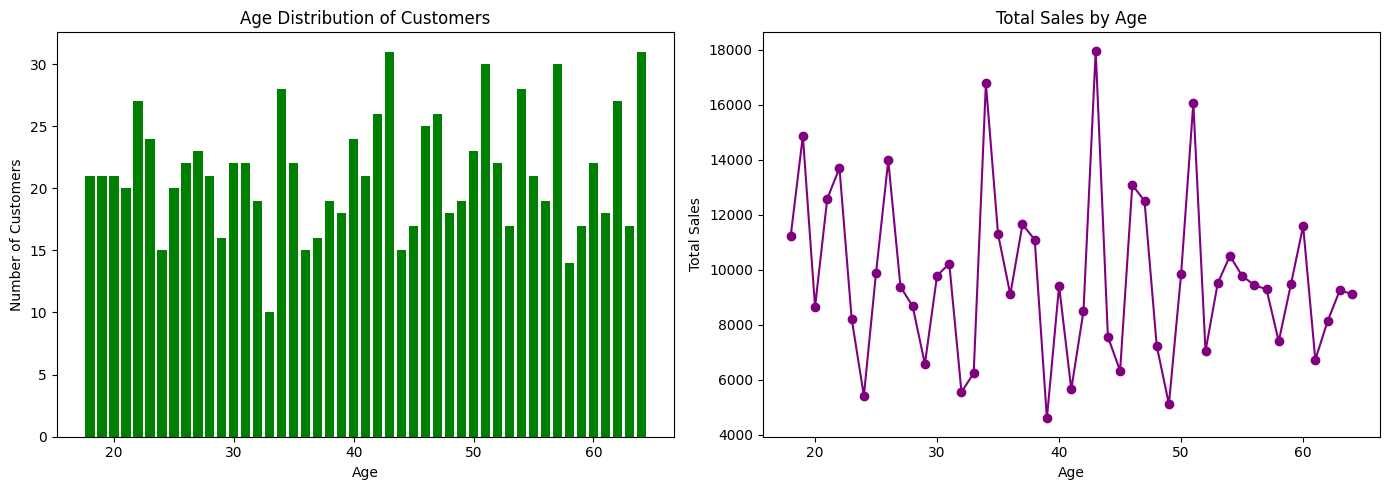

In [23]:
fig, ax2 = plt.subplots(1, 2, figsize=(14, 5))

# Plot age distribution
ax2[0].bar(age_distribution.index, age_distribution, color='green')
ax2[0].set_title('Age Distribution of Customers')
ax2[0].set_xlabel('Age')
ax2[0].set_ylabel('Number of Customers')

# Plot total sales by age
ax2[1].plot(age_sales.index, age_sales, marker='o', color='purple')
ax2[1].set_title('Total Sales by Age')
ax2[1].set_xlabel('Age')
ax2[1].set_ylabel('Total Sales')

plt.tight_layout()
plt.show()


In [24]:
## 2. Product Preferences Analysis 
# Total sales by product category
category_sales = retail_data.groupby('Product Category')['Total Amount'].sum()
average_sales_category = retail_data.groupby('Product Category')['Total Amount'].mean()
print(category_sales)
print(average_sales_category)

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64
Product Category
Beauty         467.475570
Clothing       443.247863
Electronics    458.786550
Name: Total Amount, dtype: float64


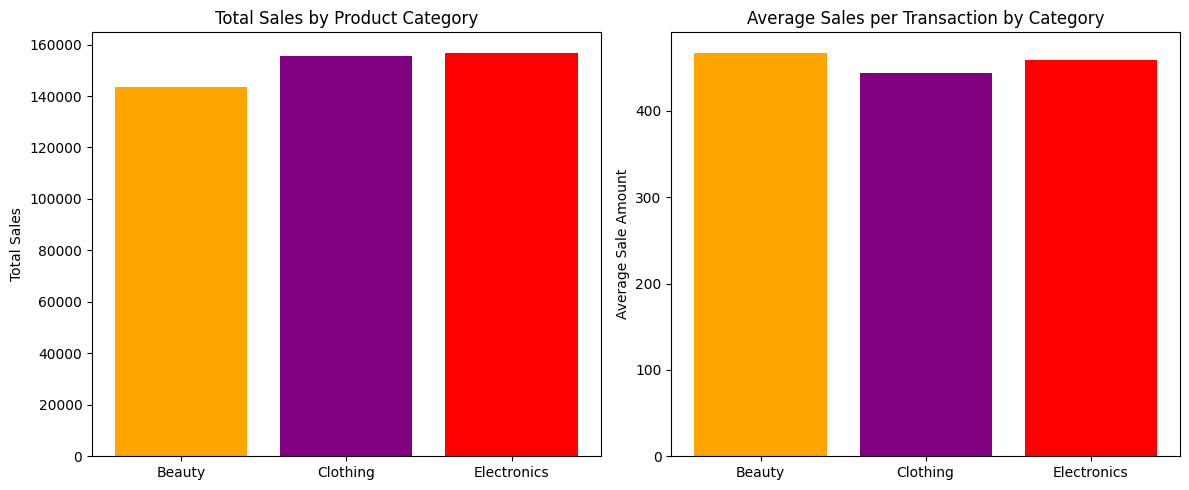

In [25]:
# Plot sales by product category
fig, ax3 = plt.subplots(1, 2, figsize=(12, 5))

# Total sales by category
ax3[0].bar(category_sales.index, category_sales, color=['orange', 'purple', 'red'])
ax3[0].set_title('Total Sales by Product Category')
ax3[0].set_ylabel('Total Sales')

# Average sales by category
ax3[1].bar(average_sales_category.index, average_sales_category, color=['orange', 'purple', 'red'])
ax3[1].set_title('Average Sales per Transaction by Category')
ax3[1].set_ylabel('Average Sale Amount')

plt.tight_layout()
plt.show()


In [26]:
### 3. Customer Segmentation ###

# Create age groups for segmentation
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
retail_data['Age Group'] = pd.cut(retail_data['Age'], bins=bins, labels=labels)
# Calculate total and average spending per age group
age_group_sales = retail_data.groupby('Age Group')['Total Amount'].sum()
age_group_avg_sales = retail_data.groupby('Age Group')['Total Amount'].mean()
print(age_group_avg_sales)
print("Age Group Sales\n",age_group_sales)

Age Group
18-25    495.506757
26-35    480.390244
36-45    454.801980
46-55    439.694323
56-65    412.358974
Name: Total Amount, dtype: float64
Age Group Sales
 Age Group
18-25     73335
26-35     98480
36-45     91870
46-55    100690
56-65     80410
Name: Total Amount, dtype: int64


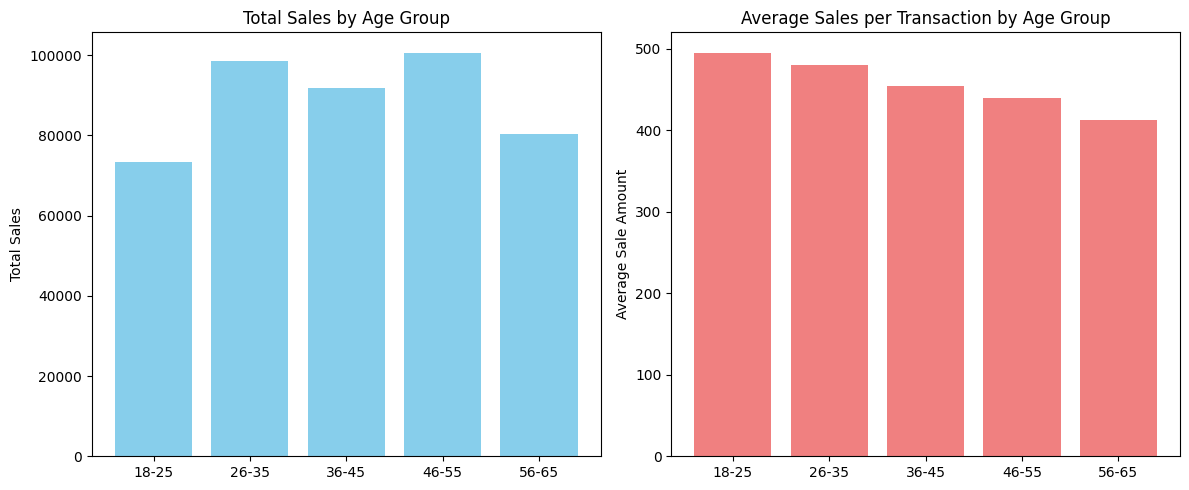

In [27]:
# Plot spending by age group
fig, ax4 = plt.subplots(1, 2, figsize=(12, 5))

# Total sales by age group
ax4[0].bar(age_group_sales.index, age_group_sales, color='skyblue')
ax4[0].set_title('Total Sales by Age Group')
ax4[0].set_ylabel('Total Sales')

# Average sales by age group
ax4[1].bar(age_group_avg_sales.index, age_group_avg_sales, color='lightcoral')
ax4[1].set_title('Average Sales per Transaction by Age Group')
ax4[1].set_ylabel('Average Sale Amount')

plt.tight_layout()
plt.show()


In [28]:
# 4. Heatmap for Sales by Age Group and Product Category 

# Create pivot table for heatmap (sum of sales by Age Group and Product Category)
heatmap_data = retail_data.pivot_table(values='Total Amount', index='Age Group', columns='Product Category', aggfunc='sum', fill_value=0)
heatmap_data


Product Category,Beauty,Clothing,Electronics
Age Group,,,
18-25,26320,22425,24590
26-35,31240,39975,27265
36-45,28405,29550,33915
46-55,34720,30485,35485
56-65,17870,29060,33480


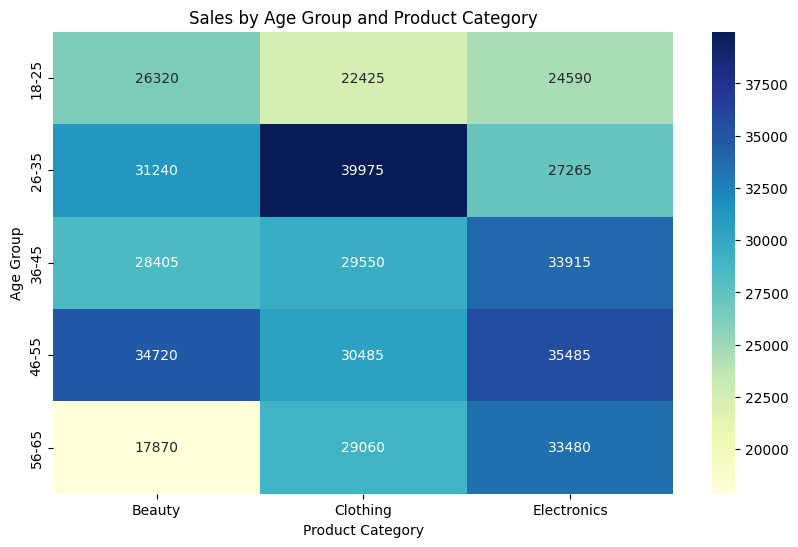

In [29]:
# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".0f")
plt.title('Sales by Age Group and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Age Group')
plt.show()

## Actionable Recommendations 

1. Gender-Based Promotions

    Gender-balanced customer base allows for gender-specific marketing campaigns.
    
    Target male and female customers with specific products based on spending patterns.

2. Age Group-Focused Marketing
    
    Identify high-spending age groups (e.g., 26-35) and focus marketing campaigns on these groups.
    
    Offer targeted discounts and promotions for different age segments to enhance engagement.
3. Product Category Optimization

    Electronics and clothing categories generate high sales, indicating strong demand.
    
    Consider expanding these categories and exploring cross-promotional opportunities with other products.


4. Seasonal Campaigns for Low-Performing Periods

    Use insights from sales trends to introduce seasonal promotions in months with typically lower sales.
    
    Offer bundles or loyalty incentives to smooth out fluctuations in sales.